In [24]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import scipy as sp
from scipy import interpolate
%matplotlib inline

In [243]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
e_vol[0]*1e-9

18.954691316653832

### Surface area

In [244]:
(e_vol[0] - e_vol[1])/0.5*1e-6

2745.1756228150402

### Area layers

In [245]:
area = -np.diff(e_vol)/0.5/1000/1000
area

array([ 2.74517562e+03,  2.69553132e+03,  2.66903819e+03,  2.62608089e+03,
        2.59290231e+03,  2.53045133e+03,  2.46239986e+03,  2.33030417e+03,
        2.26686304e+03,  2.15755323e+03,  2.08099533e+03,  1.92363448e+03,
        1.82713990e+03,  1.62941020e+03,  1.48532584e+03,  1.24433011e+03,
        1.08277559e+03,  7.64488876e+02,  5.32153250e+02,  1.91653798e+02,
        6.56703990e+01,  3.29729598e+00,  1.56499009e+00,  2.63987594e-01,
        1.31508333e-01,  5.70612430e-02,  4.10298481e-02,  3.73055090e-02,
        3.22641574e-02,  2.48703394e-02,  1.73419917e-02,  1.24015847e-02,
        6.21758484e-03,  6.21758484e-03,  6.21758484e-03,  6.18399986e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

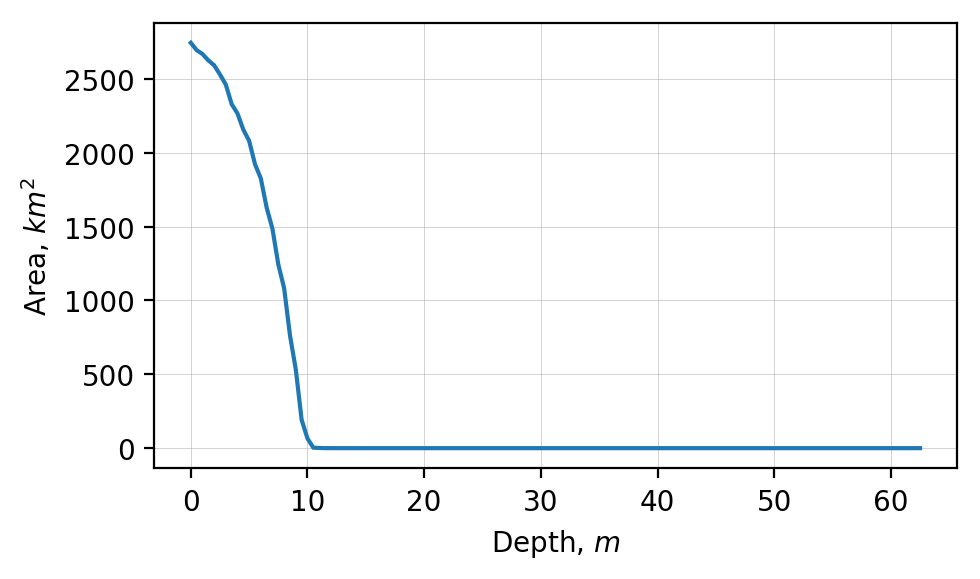

In [246]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

axes.plot(depths[:-1], area)
# axes.plot((bl.time + shift)/12 + 1996, bl.species['Csc']['concentration'].flatten())
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)
# axes.scatter((cl_stclaitr_210['seq_m'].values + shift)/12 + 1996, cl_stclaitr_210['Result B'].values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)

# axes.set_ylim(0,12)
# axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
# axes.set_ylabel('Lake St. Clair Cl, $mg\cdot L^{-1}$')


# handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('Depth, $m$')
axes.set_ylabel('Area, $km^2$')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/evap_recent.pdf')






### Average values

In [247]:
df = pd.read_csv('../../measurements/GLNPO/GLENDA Cl.csv')
df['VALUE_1'] = pd.to_numeric(df['VALUE_1'], errors='coerce')
df['STN_DEPTH_M'] = pd.to_numeric(df['STN_DEPTH_M'], errors='coerce')
df['SAMPLING_DATE'] = pd.to_datetime(df['SAMPLING_DATE'], errors='coerce')

In [248]:
western_basin = ['ER58', 'ER59', 'ER60', 'ER61', 'ER91M', 'ER92']
central_basin = ['ER42', 'ER43', 'ER73', 'ER37', 'ER36', 'ER38', 'ER78M', 'ER30', 'ER31', 'ER32', 'ER95B']
eastern_basin = ['ER93B', 'ER15M', 'ER63', 'ER09', 'ER10']

In [249]:
df = df[(df['STATION_ID'].isin(western_basin))]


In [250]:
area_spline = sp.interpolate.InterpolatedUnivariateSpline(depths[:-1], area, ext=3)

In [251]:
area_spline(2)

array(2592.90230693)

In [252]:
EB_measuremnts = df[['SAMPLING_DATE', 'STN_DEPTH_M', 'VALUE_1']]

In [253]:
EB_measuremnts['Year'] = EB_measuremnts.SAMPLING_DATE.dt.year
EB_measuremnts['Month'] = EB_measuremnts.SAMPLING_DATE.dt.month

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [254]:
EB_res = []

In [255]:
EB_measuremnts.tail()

,SAMPLING_DATE,STN_DEPTH_M,VALUE_1,Year,Month
8716,1999-08-05 00:25:00,28.0,10.2201,1999,8
8719,1999-08-05 03:42:00,31.0,12.4686,1999,8
8725,1999-08-05 03:42:00,31.0,12.5236,1999,8
8726,1999-08-05 03:42:00,31.0,12.5216,1999,8
8727,1999-08-05 03:42:00,31.0,12.5610,1999,8


In [256]:
for y in EB_measuremnts.Year.unique():
    y_slice = EB_measuremnts[(EB_measuremnts.Year==y)]
    for m in y_slice.Month.unique():
        my_slice = y_slice[y_slice.Month==m]
        length = my_slice.shape[0]
        accum = 0
        for i in range(length):
            accum +=area_spline(my_slice.iloc[i].STN_DEPTH_M)*my_slice.iloc[i].VALUE_1
        res = accum/area_spline(my_slice.STN_DEPTH_M).sum()
        EB_res.append([y,m,res])

In [257]:
pd.DataFrame(EB_res, columns=['Year', 'Month', 'Value']).to_csv('Western_basin_area_weighted_averages_mgL.csv')

In [258]:
EB_measuremnts.groupby(['Year','Month']).describe()['VALUE_1']['mean'].reset_index().to_csv('Western_basin_averages_mgL.csv')


In [206]:
EB_measuremnts[(EB_measuremnts.Year==2003) & (EB_measuremnts.Month==4)].describe()

,STN_DEPTH_M,VALUE_1,Year,Month
count,96.000000,96.000000,96.0,96.0
mean,22.353125,14.761716,2003.0,4.0
std,1.764083,3.807069,0.0,0.0
min,18.000000,-0.001551,2003.0,4.0
25%,21.600000,14.717664,2003.0,4.0
50%,22.800000,15.333283,2003.0,4.0
75%,23.500000,15.696554,2003.0,4.0
max,25.000000,23.505087,2003.0,4.0
